In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import os
import cv2
import imghdr
data_dir = "C:/Users/prasa/Downloads/dataset"

image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
        

C:\Users\prasa\AppData\Local\Temp\ipykernel_29688\1636253446.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:

import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory("C:/Users/prasa/Downloads/dataset")



Found 5210 files belonging to 2 classes.


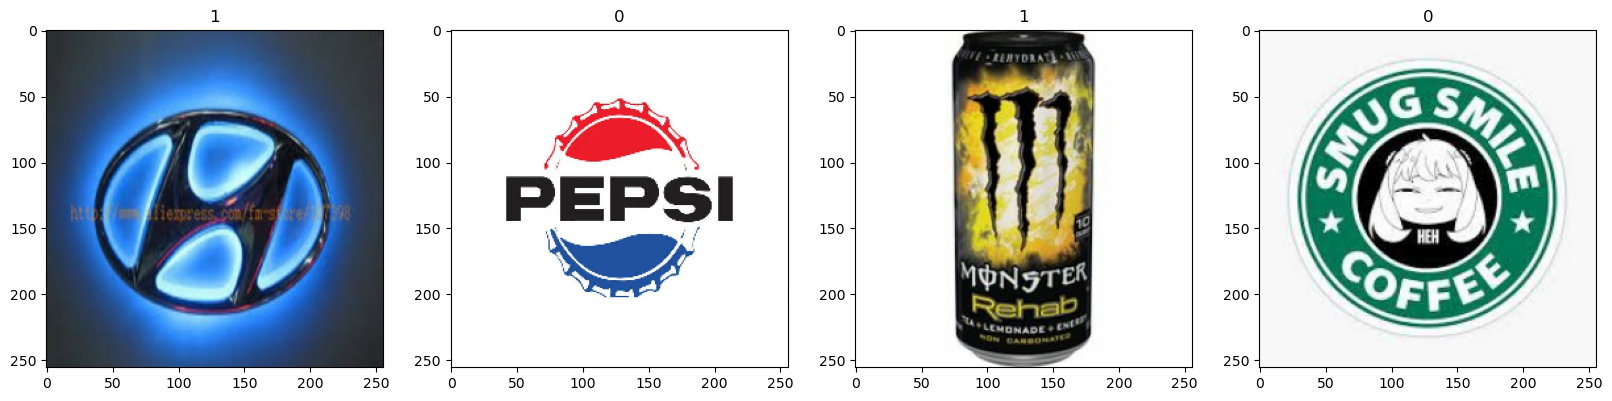

In [5]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [6]:
data = data.map(lambda x,y: (x/255, y))

data.as_numpy_iterator().next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

c:\Users\prasa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:

logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 51s 409ms/step - accuracy: 0.8023 - loss: 0.5104 - val_accuracy: 0.8242 - val_loss: 0.4450
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 43s 380ms/step - accuracy: 0.8523 - loss: 0.3990 - val_accuracy: 0.8486 - val_loss: 0.3907
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 45s 390ms/step - accuracy: 0.8806 - loss: 0.3242 - val_accuracy: 0.8662 - val_loss: 0.3651
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 44s 385ms/step - accuracy: 0.9024 - loss: 0.2741 - val_accuracy: 0.8711 - val_loss: 0.3506
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 42s 369ms/step - accuracy: 0.9136 - loss: 0.2132 - val_accuracy: 0.8711 - val_loss: 0.3622
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 40s 346ms/step - accuracy: 0.9407 - loss: 0.1642 - val_accuracy: 0.9043 - val_loss: 0.3596
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 40s 347ms/step - accuracy: 0.9579 - loss: 0.1186 - val_accuracy: 0.8926 - val_loss: 0.4015
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 41s 361ms/step - accuracy: 0.9761 - loss: 0

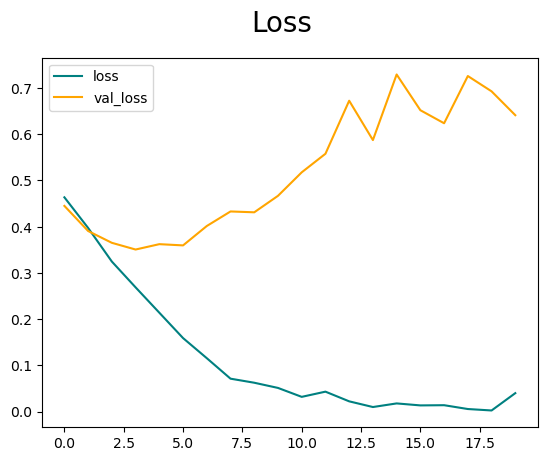

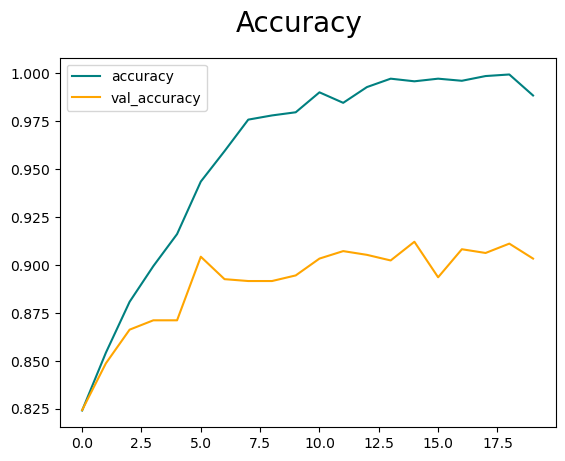

In [11]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [12]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
tf.Tensor(0.9045454, shape=(), dtype=float32) tf.Tensor(0.97073174, shape=(), dtype=float32) tf.Tensor(0.89453125, shape=(), dtype=float32)


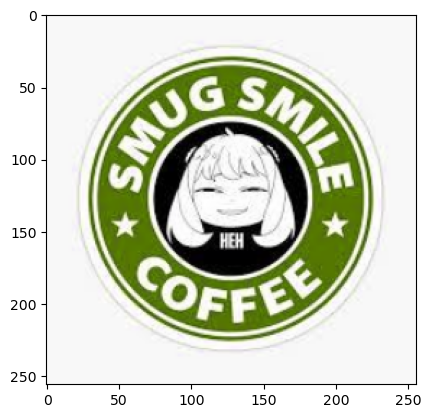

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class is Fake


In [14]:
import cv2
img = cv2.imread("C:/Users/prasa/Downloads/dataset/Fake/starbucksfake (12).jpg")
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5: 
    print(f'Predicted class is Original')
else:
    print(f'Predicted class is Fake')

In [20]:
import os
from tensorflow.keras.models import load_model

# Save the model
model.save(os.path.join('models', 'imageclassifier.h5'))

# Load the model
model_path = os.path.join('models', 'imageclassifier.h5')
if os.path.exists(model_path):
    new_model = load_model(model_path)
    # Assuming 'resize' and 'np' are defined elsewhere in your code
    new_model.predict(np.expand_dims(resize / 255, 0))
else:
    print(f"Model file not found at {model_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [3]:
import os
from tensorflow.keras.models import load_model

# Save the model
model.save(os.path.join('models', 'imageclassifier1.h5'))

# Load the model
model_path = os.path.join('models', 'imageclassifier1.h5')
if os.path.exists(model_path):
    new_model = load_model(model_path)
    # Assuming 'resize' and 'np' are defined elsewhere in your code
    new_model.predict(np.expand_dims(resize / 255, 0))
else:
    print(f"Model file not found at {model_path}")


NameError: name 'model' is not defined

In [21]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[1.]], dtype=float32)

In [22]:
saved_model_path = os.path.abspath('models/imageclassifier.h5')
print("Saved model path:", saved_model_path)

Saved model path: c:\Users\prasa\AppData\Local\Programs\Microsoft VS Code\models\imageclassifier.h5


In [2]:
import os
saved_model_path = os.path.abspath('models/imageclassifier1.h5')
print("Saved model path:", saved_model_path)

Saved model path: c:\Users\prasa\Downloads\fakelogodetect\models\imageclassifier1.h5


ikkade model file falsk tho cheyyali


In [4]:
from flask import Flask, request, jsonify
import os
import numpy as np
from tensorflow.keras.models import load_model

app = Flask(__name__)

# Load the model
# saved_model_path = os.path.abspath('models/imageclassifier.h5')
# model = load_model(saved_model_path)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the input data from the request
        data = request.json  # Assuming JSON input
        
        data = data.map(lambda x,y: (x/255, y))
        data.as_numpy_iterator().next()
        if 'image' in data:
            # Preprocess the image (example code)
            # image = preprocess_image(data['image'])
            # Make predictions
            predictions = model.predict(np.expand_dims(data / 255, 0))
        else:
            return jsonify({'error': 'Input data format not supported'})

        # Format the predictions as needed
        # For example, convert to a dictionary with class labels and probabilities
        result = {'predictions': predictions.tolist()}  # Convert predictions to list for JSON serialization
        return jsonify(result)
    except Exception as e:
        return jsonify({'error': str(e)})



if __name__ == '__main__':
    app.run(debug=True)  # Run the app in debug mode for development


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\prasa\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import tensorflow as tf

app = Flask(__name__)

# Load the saved model
model_path = "C:/Users/prasa/Downloads/fakelogodetect/imageclassifier.h5"
model = load_model(model_path)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

@app.route('/predict', methods=['POST'])
def predict():
    # Get the image data from the request
    image_file = request.files['image']
    image = cv2.imdecode(np.fromstring(image_file.read(), np.uint8), cv2.IMREAD_COLOR)
    
    # Preprocess the image
    resized_image = tf.image.resize(image, (256, 256))
    processed_image = np.expand_dims(resized_image / 255, 0)
    
    # Make prediction
    prediction = model.predict(processed_image)
    
    # Return the prediction result
    if prediction > 0.5:
        result = {'prediction': 'Original'}
    else:
        result = {'prediction': 'Fake'}
    
    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1

In [6]:
pip list


Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         23.2.0
Automat                       20.2.0
autopep8

In [7]:
# Create a virtual environment
python -m venv venv_name

# Activate the virtual environment
# On Windows
venv_name\Scripts\activate
# # On macOS/Linux
# source venv_name/bin/activate

# Install required packages
pip install flask tensorflow opencv-python matplotlib

# Run your Flask app
python your_flask_app.py


SyntaxError: invalid syntax (659231063.py, line 2)

In [5]:
%tb



SystemExit: 1

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
import os
import cv2
import imghdr

data_dir = "C:/Users/prasa/Downloads/dataset"

# Remove images with invalid extensions
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# Load data using TensorFlow's image_dataset_from_directory with seed argument
train_data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32, image_size=(256, 256), validation_split=0.3, subset="training", seed=42)
val_data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32, image_size=(256, 256), validation_split=0.3, subset="validation", seed=42)

# Preprocess data
train_data = train_data.map(lambda x, y: (x / 255, y))
val_data = val_data.map(lambda x, y: (x / 255, y))

# Load ResNet-101 model
resnet101 = tf.keras.applications.ResNet101(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

# Freeze the layers in ResNet-101
for layer in resnet101.layers:
    layer.trainable = False

# Create your classification model on top of ResNet-101
model = tf.keras.Sequential([
    resnet101,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=10, validation_data=val_data)

# Evaluate the model
test_data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32, image_size=(256, 256), validation_split=0.3, subset="validation", seed=42)
test_loss, test_accuracy = model.evaluate(test_data)

print("ResNet-101 Model Test Accuracy:", test_accuracy)


Found 5210 files belonging to 2 classes.
Using 3647 files for training.
Found 5210 files belonging to 2 classes.
Using 1563 files for validation.
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 41s 0us/step
Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 678s 6s/step - accuracy: 0.7379 - loss: 0.5586 - val_accuracy: 0.8292 - val_loss: 0.4433
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 703s 6s/step - accuracy: 0.8095 - loss: 0.4735 - val_accuracy: 0.8292 - val_loss: 0.4300
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 718s 6s/step - accuracy: 0.8091 - loss: 0.4573 - val_accuracy: 0.8305 - val_loss: 0.4237
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 719s 6s/step - accuracy: 0.8099 - loss: 0.4457 - val_accuracy: 0.8349 - val_loss: 0.4217
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 715s 6s/step - accuracy: 0.8137 - loss: 0.4420 - val_accuracy: 0.8407 - val_loss: 0.4215
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 755s 7s/step - accuracy: 0.8198 - loss: 0.4330 - val_accuracy: 0.8407 - val_loss: 0.4115
Epoch 7/10
114/114 ━━━━━━━

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Set device (GPU if available, else CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define data transforms with data augmentation
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset with augmented transforms
data_dir = "C:/Users/prasa/Downloads/dataset"
train_data = ImageFolder(root=data_dir, transform=train_transform)

# Split dataset into train and validation
train_size = int(0.7 * len(train_data))
val_size = int(0.2 * len(train_data))
test_size = len(train_data) - train_size - val_size
train_data, val_data, test_data = torch.utils.data.random_split(train_data, [train_size, val_size, test_size])

# Create data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Load pre-trained ResNet-101 model
resnet101 = models.resnet101(pretrained=True)

# Fine-tune ResNet-101
for param in resnet101.layer4.parameters():
    param.requires_grad = True  # Fine-tune the last layer block

# Modify the final fully connected layer for binary classification
num_ftrs = resnet101.fc.in_features
resnet101.fc = nn.Linear(num_ftrs, 1)

# Send model to device
resnet101 = resnet101.to(device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam([
    {'params': resnet101.layer4.parameters(), 'lr': 1e-4},  # Lower learning rate for fine-tuned layers
    {'params': resnet101.fc.parameters(), 'lr': 1e-3},  # Higher learning rate for new fully connected layer
])

# Training loop with fine-tuning
num_epochs = 10
best_val_accuracy = 0.0
for epoch in range(num_epochs):
    resnet101.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet101(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    
    # Validation
    resnet101.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs_val, labels_val in val_loader:
            inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)
            outputs_val = resnet101(inputs_val)
            predicted_val = (outputs_val.squeeze() > 0.5).float()
            total_val += labels_val.size(0)
            correct_val += (predicted_val == labels_val.float()).sum().item()
    
    val_accuracy = correct_val / total_val
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Save the best model based on validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(resnet101.state_dict(), "best_model.pth")

# Load the best model for evaluation
resnet101.load_state_dict(torch.load("best_model.pth"))

# Evaluation on test set
resnet101.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs_test, labels_test in test_loader:
        inputs_test, labels_test = inputs_test.to(device), labels_test.to(device)
        outputs_test = resnet101(inputs_test)
        predicted_test = (outputs_test.squeeze() > 0.5).float()
        total_test += labels_test.size(0)
        correct_test += (predicted_test == labels_test.float()).sum().item()

test_accuracy = correct_test / total_test
print(f"Test Accuracy: {test_accuracy:.4f}")


c:\Users\prasa\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\prasa\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
